In [ ]:
import benchmax.inspection as ev
import pandas as pd
import tikzplotlib

stats    = ev.csv_to_pandas("stats_qfnra_25-04-11_09:35_smtrat-Eval_Calc-eval.csv")
stats    = stats.join(ev.csv_to_pandas("stats_qfnra_25-04-11_09:35_smtrat-Eval_Mcsat-eval.csv"))
stats    = stats.join(ev.csv_to_pandas("stats_qfnra_25-04-11_09:35_smtrat-Eval_Nucad-eval.csv"))

stats    = stats.join(ev.csv_to_pandas("stats_qfnra_25-04-16_16:55_smtrat-Eval_CalcPBcldbounds-eval.csv"))
stats    = stats.join(ev.csv_to_pandas("stats_qfnra_25-04-16_16:55_smtrat-Eval_McsatPBcldbounds-eval.csv"))
stats    = stats.join(ev.csv_to_pandas("stats_qfnra_25-04-17_10:37_smtrat-Eval_NucadPBcldbounds-eval.csv"))

stats = ev.rename_solvers(stats, {
 'smtrat-Eval_Mcsat-eval': "MCSAT",
 'smtrat-Eval_Calc-eval': "CAlC",
 'smtrat-Eval_Nucad-eval': "NuCAD",
 'smtrat-Eval_McsatPBcldbounds-eval': "MCSAT<BcLdBounds,BcLdBoundsCov>",
 'smtrat-Eval_CalcPBcldbounds-eval': "CAlC<BcLdBounds,BcLdBoundsCov>",
 'smtrat-Eval_NucadPBcldbounds-eval': "NuCAD<BcLdBounds>"
 })

def compute_poly_count(df, s):
    df[(s,'smtrat-cadcells_projections.poly_count')] = df[(s,'smtrat-cadcells_projections.coefficient.level.count')] + df[(s,'smtrat-cadcells_projections.discriminant.level.count')] + df[(s,'smtrat-cadcells_projections.factor.level.count')] + df[(s,'smtrat-cadcells_projections.leading_coefficient.level.count')] + df[(s,'smtrat-cadcells_projections.resultant.level.count')]
    df[(s,'smtrat-cadcells_projections.discres.poly_count')] = df[(s,'smtrat-cadcells_projections.discriminant.level.count')] + df[(s,'smtrat-cadcells_projections.resultant.level.count')]

def compute_poly_total_degree(df, s):
    df[(s,'smtrat-cadcells_projections.poly.total_degree.sum')] = df[(s,'smtrat-cadcells_projections.coefficient.total_degree.sum')] + df[(s,'smtrat-cadcells_projections.discriminant.total_degree.sum')] + df[(s,'smtrat-cadcells_projections.factor.total_degree.sum')] + df[(s,'smtrat-cadcells_projections.leading_coefficient.total_degree.sum')] + df[(s,'smtrat-cadcells_projections.resultant.total_degree.sum')]
    df[(s,'smtrat-cadcells_projections.poly.total_degree.count')] = df[(s,'smtrat-cadcells_projections.coefficient.total_degree.count')] + df[(s,'smtrat-cadcells_projections.discriminant.total_degree.count')] + df[(s,'smtrat-cadcells_projections.factor.total_degree.count')] + df[(s,'smtrat-cadcells_projections.leading_coefficient.total_degree.count')] + df[(s,'smtrat-cadcells_projections.resultant.total_degree.count')]
    df[(s,'smtrat-cadcells_projections.poly.total_degree.avg')] = df[(s,'smtrat-cadcells_projections.poly.total_degree.sum')] / df[(s,'smtrat-cadcells_projections.poly.total_degree.count')]
    df[(s,'smtrat-cadcells_projections.poly.total_degree.max')] = df[[(s,'smtrat-cadcells_projections.coefficient.total_degree.max'),(s,'smtrat-cadcells_projections.discriminant.total_degree.max'),(s,'smtrat-cadcells_projections.factor.total_degree.max'),(s,'smtrat-cadcells_projections.leading_coefficient.total_degree.max'),(s,'smtrat-cadcells_projections.resultant.total_degree.max')]].max(axis=1)

def compute_interval_count(df, s):
    df[(s,'smtrat-cadcells_heuristics.interval.point_count.rel')] = df[(s,'smtrat-cadcells_heuristics.interval.point_count.by_depth.total')] / df[(s,'smtrat-cadcells_heuristics.interval.count.by_depth.total')]
    df[(s,'smtrat-cadcells_heuristics.interval.closed_count.rel')] = df[(s,'smtrat-cadcells_heuristics.interval.closed_count.by_depth.total')] / df[(s,'smtrat-cadcells_heuristics.interval.count.by_depth.total')]
    df[(s,'smtrat-cadcells_heuristics.interval.halfclosed_count.rel')] = df[(s,'smtrat-cadcells_heuristics.interval.halfclosed_count.by_depth.total')] / df[(s,'smtrat-cadcells_heuristics.interval.count.by_depth.total')]
    df[(s,'smtrat-cadcells_heuristics.interval.open_count.rel')] = df[(s,'smtrat-cadcells_heuristics.interval.open_count.by_depth.total')] / df[(s,'smtrat-cadcells_heuristics.interval.count.by_depth.total')]

def compute_timer(df, s):
    def sum_timer(df,s,result,timers):
        df[(s,result+'.overall_ms')] = sum([df[(s,t+'.overall_ms')] for t in timers])
        df[(s,result+'.overall_µs')] = sum([df[(s,t+'.overall_µs')] for t in timers])
        df[(s,result+'.count')] = sum([df[(s,t+'.count')] for t in timers])
        df[(s,result+'.active_at_timeout')] = sum([df[(s,t+'.active_at_timeout')] for t in timers])

    sum_timer(df, s, 'smtrat-cadcells_projections.timer.real_root_isolation', ['smtrat-cadcells_projections.timer.real_roots','smtrat-cadcells_projections.timer.is_nullified', 'smtrat-cadcells_projections.timer.num_roots'])

    if 'smtrat-cadcells_projections.timer.evaluate.overall_ms' in ev.get_fields(df,s):
        sum_timer(df, s, 'smtrat-cadcells_projections.timer.evaluation', ['smtrat-cadcells_projections.timer.evaluate','smtrat-cadcells_projections.timer.is_zero'])

    if 'mcsat-assignment-arithmetic_timer.real_root_isolation.overall_ms' in ev.get_fields(df,s):
        sum_timer(df, s, 'smtrat-cadcells_projections.timer.real_root_isolation', ['smtrat-cadcells_projections.timer.real_root_isolation','mcsat-assignment-arithmetic_timer.real_root_isolation'])
        sum_timer(df, s, 'smtrat-cadcells_projections.timer.evaluation', ['smtrat-cadcells_projections.timer.evaluation','mcsat-assignment-arithmetic_timer.evaluate'])
        sum_timer(df, s, 'smtrat-cadcells_projections.timer', ['smtrat-cadcells_projections.timer','mcsat-assignment-arithmetic_timer.real_root_isolation','mcsat-assignment-arithmetic_timer.evaluate'])

for s in ev.get_solvers(stats):
    compute_poly_count(stats, s)
    compute_poly_total_degree(stats, s)
    compute_interval_count(stats, s)
    compute_timer(stats, s)
    stats = stats.copy()

def sanitize(df):
    for solver in ev.get_solvers(df):
        df.loc[(df[(solver,'peak_memory_kbytes')]>3900000) & (df[(solver,'answer')]=='segfault'),(solver,'answer')] = 'memout'
        df.loc[(df[(solver,'answer')].isna()),(solver,'answer')] = 'timeout'


stats = stats.join(ev.csv_to_pandas('stats_solvers-qfnra_25-01-17_09:59.csv', rename={'z3-wrapper.sh':'z3', 'cvc5-wrapper.sh':'cvc5','yices2-wrapper.sh':'yices2'}))

sanitize(stats)

ev.transform_to_seconds(stats)
ev.setup_accessible_styles()

solvers = list(ev.get_solvers(stats))

/home/jnalbach/code/benchmax-py/benchmax/inspection/load.py:126: DtypeWarning: Columns (48,295) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, header=[0, 1], index_col=0)
/home/jnalbach/code/benchmax-py/benchmax/inspection/load.py:126: DtypeWarning: Columns (124) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, header=[0, 1], index_col=0)


In [3]:
ev.inspect_answer(stats)

CAlC  MCSAT  NuCAD  CAlC<BcLdBounds,BcLdBoundsCov>  \
count    12154  12154  12154                           12154   
sat       5153   5283   5039                            5153   
unsat     4911   4975   4818                            4949   
timeout   1675   1853   1844                            1638   
memout     415     43    453                             414   
invalid      0      0      0                               0   
solved   10064  10258   9857                           10102   

         MCSAT<BcLdBounds,BcLdBoundsCov>  NuCAD<BcLdBounds>     z3   cvc5  \
count                              12154              12154  12154  12154   
sat                                 5285               4969   5700   5370   
unsat                               5024               4850   5660   5722   
timeout                             1803               1849    791   1059   
memout                                42                486      0      0   
invalid                                0                  0      3      3   
solved                             10309               9819  11360  11092   

         yices2  
count     12154  
sat        5329  
unsat      5526  
timeout    1299  
memout        0  
invalid       0  
solved    10855

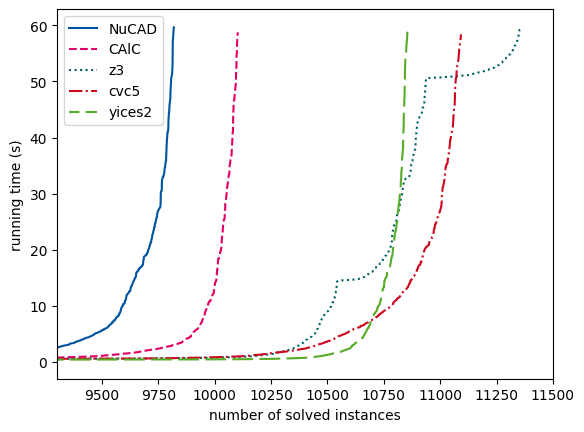

In [5]:
plot = ev.performance_profile(stats,['NuCAD<BcLdBounds>','CAlC<BcLdBounds,BcLdBoundsCov>','z3','cvc5','yices2'])
plot.axes.legend(['NuCAD','CAlC','z3','cvc5','yices2'])
plot.set_xlim(9300,11500)
plot.set_ylabel('running time (s)')
tikzplotlib.save('results_qfnra.tex',axis_width='7cm',axis_height='7cm')